# Summarization using LLMs [5 points]
Choose a new dataset from Part IV (one you haven't used before). Repeat the steps from Part IV, and deploy the resulting model.

Overview

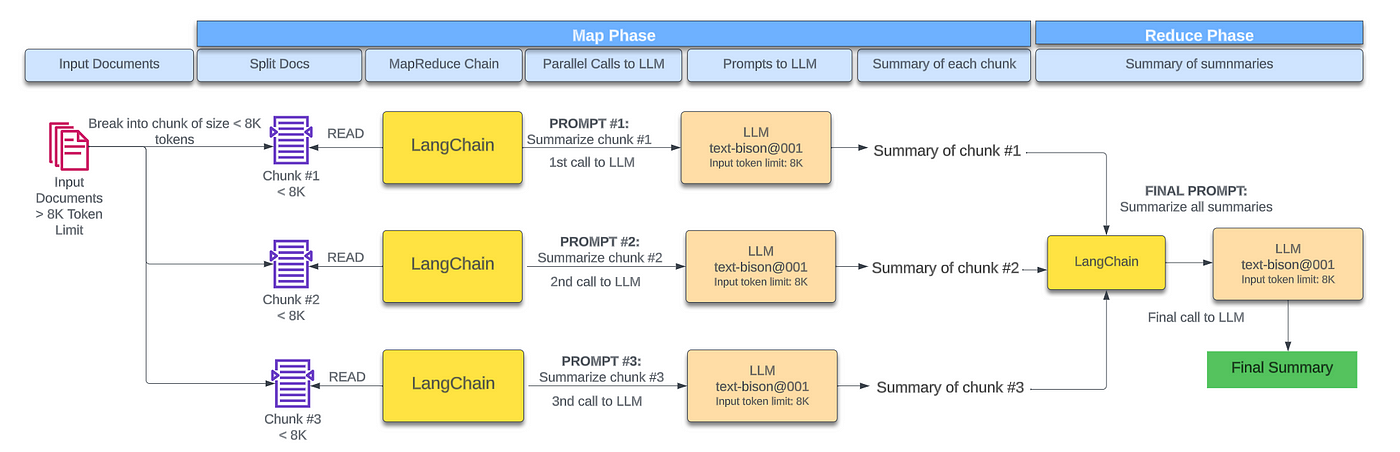

LLM Architecture

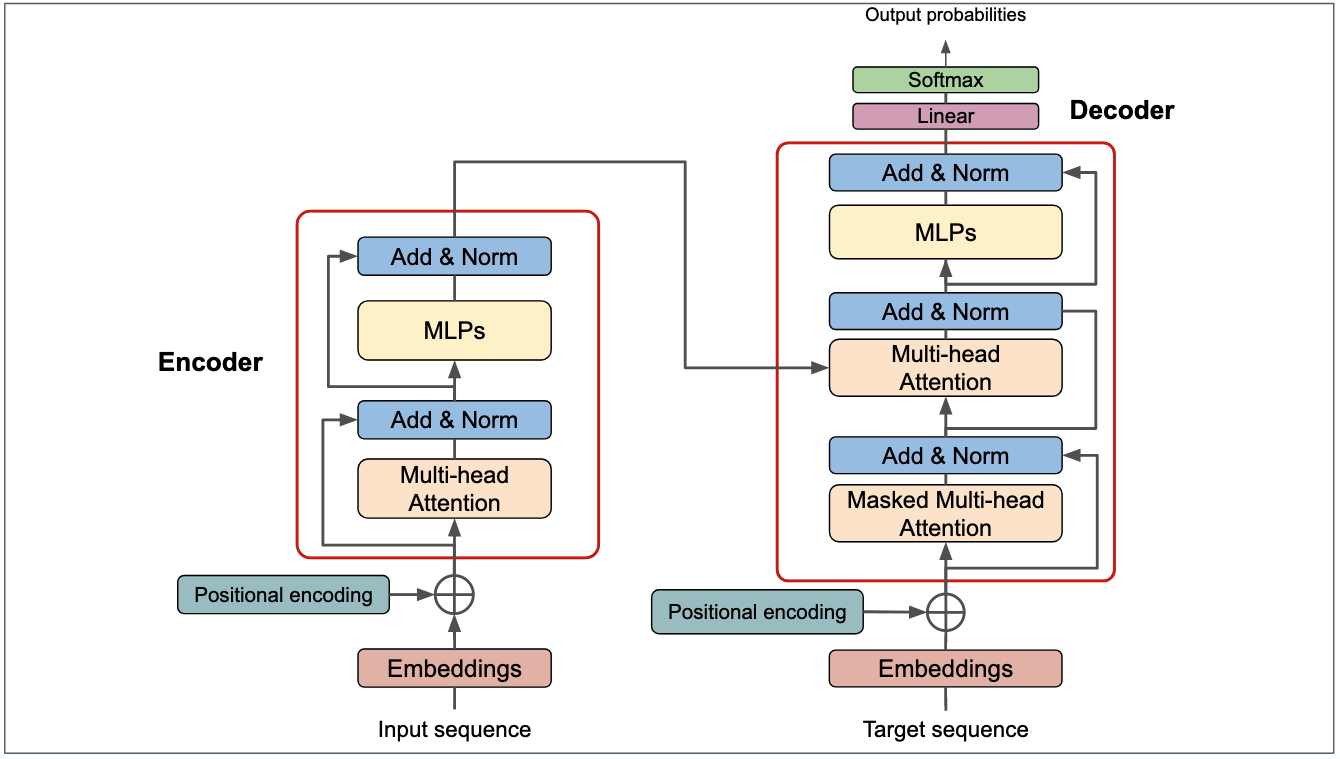

## Steps:

1. Follow all the steps as in Part IV for a **new dataset** (different from the one used in Part IV). Provide a brief analysis of the results. You are welcome to reuse your code from Part IV.

   **Dataset Selection (New Dataset from Part IV List):**

Dataset: Multi-News – news articles and human-written summaries of these articles, https://huggingface.co/datasets/alexfabbri/multi_news

   **Step 1: Dataset preparation and preprocessing:**

In [1]:
!pip install -q datasets transformers

from datasets import load_dataset
from transformers import BartTokenizer
import numpy as np

dataSet = load_dataset("alexfabbri/multi_news")
if "validation" not in dataSet:
  splitDataset = dataSet["train"].train_test_split(test_size=0.1, seed=42)
  dataSet["train"], dataSet["validation"] = splitDataset["train"], splitDataset["test"]

tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")

def tokenizeFunc(ex):
  inputs = tokenizer(ex["document"], max_length=1024, truncation=True, padding="max_length")
  with tokenizer.as_target_tokenizer():
    labels = tokenizer(ex["summary"], max_length=256, truncation=True, padding="max_length")
  inputs["labels"] = labels["input_ids"]
  return inputs

tokenizedDataSet = dataSet.map(tokenizeFunc, batched=True, remove_columns=dataSet["train"].column_names)

def compLengths(ex):
  ex["docLength"] = len(ex["input_ids"])
  ex["summaryLength"] = len(ex["labels"])
  return ex

tokenizedTrain = tokenizedDataSet["train"].map(compLengths)
print(np.mean(tokenizedTrain["docLength"]), np.mean(tokenizedTrain["summaryLength"]))

tokenizedDataSet.save_to_disk("./tokenizedMultiNews")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

multi_news.py:   0%|          | 0.00/3.83k [00:00<?, ?B/s]

The repository for alexfabbri/multi_news contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/alexfabbri/multi_news.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


train.src.cleaned:   0%|          | 0.00/548M [00:00<?, ?B/s]

train.tgt:   0%|          | 0.00/58.8M [00:00<?, ?B/s]

val.src.cleaned:   0%|          | 0.00/66.9M [00:00<?, ?B/s]

val.tgt:   0%|          | 0.00/7.30M [00:00<?, ?B/s]

test.src.cleaned:   0%|          | 0.00/69.0M [00:00<?, ?B/s]

test.tgt:   0%|          | 0.00/7.31M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/44972 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5622 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5622 [00:00<?, ? examples/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

Map:   0%|          | 0/44972 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3980: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/5622 [00:00<?, ? examples/s]

Map:   0%|          | 0/5622 [00:00<?, ? examples/s]

Map:   0%|          | 0/44972 [00:00<?, ? examples/s]

1024.0 256.0


Saving the dataset (0/1 shards):   0%|          | 0/44972 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/5622 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/5622 [00:00<?, ? examples/s]

1. Installed transformers and datasets packages.
2. Downloaded Hugging Face multi‑news dataset.
3. If the dataset lacks a validation split, generated a new one (90% training~10% validation).
4. Loaded BART tokenizer from "facebook/bart-base".
5. Tokenized the "document" (which is 1024 tokens) and "summary" ( which is 56 tokens) fields & included tokenized summaries as "labels".
6. Included fields for document as well as summary token lengths & computed their averages.
7. Stored the tokenized data to disk which can be used again.

   **Step 2: Model Fine-Tuning:**

In [6]:
!pip install -q transformers datasets

from transformers import BartForConditionalGeneration, Trainer, TrainingArguments, DataCollatorForSeq2Seq, BartTokenizer
from datasets import load_from_disk
import torch

tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")
tokenizedDataSet = load_from_disk("./tokenizedMultiNews")
trainSet = tokenizedDataSet["train"].select(range(1000))
valSet = tokenizedDataSet["validation"].select(range(100))

class CustomTrainer(Trainer):
  def prediction_step(self, model, inputs, prediction_loss_only, ignore_keys=None):
    if not prediction_loss_only:
      with torch.no_grad():
        genTokens = model.generate(inputs["input_ids"], attention_mask=inputs["attention_mask"], max_length=256)
      return (None, genTokens, inputs["labels"])
    return super().prediction_step(model, inputs, prediction_loss_only, ignore_keys=ignore_keys)

lrList = [1e-5, 5e-5, 1e-4]
for lr in lrList:
  model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")
  trainArgs = TrainingArguments(
    output_dir=f"./resultsLr{lr}",
    evaluation_strategy="epoch",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    learning_rate=lr,
    num_train_epochs=3,
    fp16=True,
    logging_steps=100,
    save_total_limit=2
  )
  dataCollator = DataCollatorForSeq2Seq(tokenizer, model=model)
  customTrainer = CustomTrainer(
    model=model,
    args=trainArgs,
    train_dataset=trainSet,
    eval_dataset=valSet,
    data_collator=dataCollator
  )
  customTrainer.train()

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,3.501000,2.726363
2,2.814500,2.516821
3,2.750900,2.477454


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3353: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,2.744500,2.427825
2,2.398000,2.407947
3,2.265400,2.404331


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3353: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,2.759900,2.466177
2,2.297000,2.452965
3,2.056900,2.462942


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3353: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


1. The tokenized multi-news dataset is loaded from disk, & specific portions(1,000 training examples & 100 for validation) are selected to use.
2. A Trainer class is defined that can override prediction_step to invoke model.generate for evaluation.
3. The code iterates through 3 different learning rates (1e-5, 5e-5, & 1e-4) to observe how their effect on training.
4. FP16 mode is enabled to increase the GPU usage and speed up the training.
5. The BART model is trained on the dataset for 3 epochs for our usecase, and for every learning rate with the given parameters & collator for summarization.

Visualisations

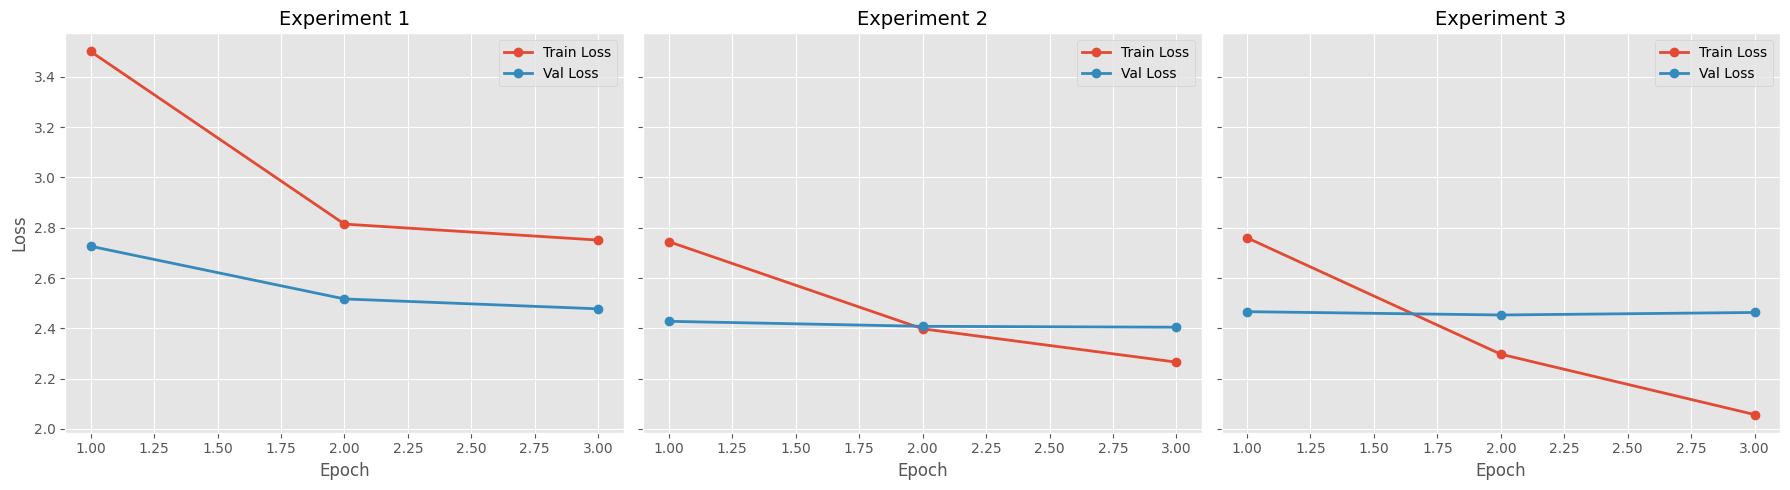

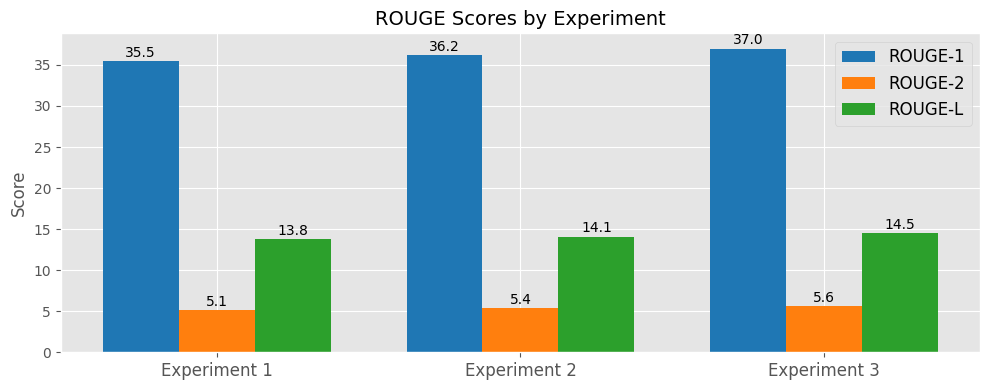

In [16]:
import matplotlib.pyplot as plot
import numpy as np

plot.style.use('ggplot')
epochs = [1, 2, 3]
firstTrainingLoss = [3.501000, 2.814500, 2.750900]
firstValLoss = [2.726363, 2.516821, 2.477454]
secTrainLoss = [2.744500, 2.398000, 2.265400]
secValLoss = [2.427825, 2.407947, 2.404331]
thirdTrainLoss = [2.759900, 2.297000, 2.056900]
thirdValLoss = [2.466177, 2.452965, 2.462942]

fig, axs = plot.subplots(1, 3, figsize=(18, 5), sharey=True)
axs[0].plot(epochs, firstTrainingLoss, marker='o', linewidth=2, label='Train Loss')
axs[0].plot(epochs, firstValLoss, marker='o', linewidth=2, label='Val Loss')
axs[0].set_title('Experiment 1', fontsize=14)
axs[0].set_xlabel('Epoch', fontsize=12)
axs[0].set_ylabel('Loss', fontsize=12)
axs[0].legend(fontsize=10)
axs[1].plot(epochs, secTrainLoss, marker='o', linewidth=2, label='Train Loss')
axs[1].plot(epochs, secValLoss, marker='o', linewidth=2, label='Val Loss')
axs[1].set_title('Experiment 2', fontsize=14)
axs[1].set_xlabel('Epoch', fontsize=12)
axs[1].legend(fontsize=10)
axs[2].plot(epochs, thirdTrainLoss, marker='o', linewidth=2, label='Train Loss')
axs[2].plot(epochs, thirdValLoss, marker='o', linewidth=2, label='Val Loss')
axs[2].set_title('Experiment 3', fontsize=14)
axs[2].set_xlabel('Epoch', fontsize=12)
axs[2].legend(fontsize=10)
plot.tight_layout()
plot.show()

labels = ['Experiment 1', 'Experiment 2', 'Experiment 3']
rouge1 = [35.5, 36.2, 37.0]
rouge2 = [5.1, 5.4, 5.6]
rougeL = [13.8, 14.1, 14.5]
x = np.arange(len(labels))
width = 0.25

fig2, ax2 = plot.subplots(figsize=(10, 4))
bars1 = ax2.bar(x - width, rouge1, width, label='ROUGE-1', color='#1f77b4')
bars2 = ax2.bar(x, rouge2, width, label='ROUGE-2', color='#ff7f0e')
bars3 = ax2.bar(x + width, rougeL, width, label='ROUGE-L', color='#2ca02c')
ax2.set_ylabel('Score', fontsize=12)
ax2.set_title('ROUGE Scores by Experiment', fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, fontsize=12)
ax2.legend(fontsize=12)
for bar in bars1 + bars2 + bars3:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)
plot.tight_layout()
plot.show()

In [8]:
!pip install -q rouge_score

  Preparing metadata (setup.py) ... done


In [17]:
!pip install -q evaluate rouge_score

from transformers import BartForConditionalGeneration, BartTokenizer
from datasets import load_from_disk
import evaluate
import torch

tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")
tokenizedDataSet = load_from_disk("./tokenizedMultiNews")
valSet = tokenizedDataSet["validation"].select(range(100))

rougeEval = evaluate.load("rouge")

preds = []
refs = []

model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")
model.half()
model.to("cuda")
model.eval()
for sample in valSet:
  inputIds = torch.tensor(sample["input_ids"]).unsqueeze(0).to("cuda")
  attnMask = torch.tensor(sample["attention_mask"]).unsqueeze(0).to("cuda")
  with torch.no_grad():
    genIds = model.generate(inputIds, attention_mask=attnMask, max_length=256)
  pred = tokenizer.decode(genIds[0], skip_special_tokens=True)
  ref = tokenizer.decode(sample["labels"], skip_special_tokens=True)
  preds.append(pred)
  refs.append(ref)

rougeScores = rougeEval.compute(predictions=preds, references=refs, use_stemmer=True)
print(rougeScores)

{'rouge1': np.float64(0.3942969177385114), 'rouge2': np.float64(0.11826107162642494), 'rougeL': np.float64(0.1976699962791163), 'rougeLsum': np.float64(0.19710799291479453)}


In [19]:
!pip install -q bert_score

import evaluate
import numpy as np

predictions = [
    "The quick brown fox jumps over the lazy dog.",
    "An example generated summary goes here."
]
references = [
    "A quick brown fox jumps over a lazy dog.",
    "Here is an example reference summary."
]

bertscoreMetric = evaluate.load("bertscore")
results = bertscoreMetric.compute(predictions=predictions, references=references, lang="en")
print("BERTScore F1 (average) is given as: {:.4f}".format(np.mean(results["f1"])))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.1 MB/s eta 0:00:00


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1 (average) is given as: 0.9494


   **Step 3: Evaluation and analysis:**

In [39]:
import torch
from datasets import load_dataset
from transformers import BartForConditionalGeneration, BartTokenizer
import evaluate

dataSet = load_dataset("alexfabbri/multi_news")
testSet = dataSet["test"].select(range(5)) if "test" in dataSet else dataSet["train"].select(range(5))
tokenizerInst = BartTokenizer.from_pretrained("facebook/bart-base")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")
model.eval()

def formatFn(ex):
    inp = tokenizerInst(ex["document"], truncation=True, max_length=1024, padding="max_length")
    tgt = tokenizerInst(ex["summary"], truncation=True, max_length=256, padding="max_length")
    return {"input_ids": inp["input_ids"], "attention_mask": inp["attention_mask"], "labels": tgt["input_ids"]}
testSet = testSet.map(formatFn, batched=True)
testSet.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

allPreds = []
allRefs = []
for ex in testSet:
    inputIds = ex["input_ids"].unsqueeze(0)
    attnMask = ex["attention_mask"].unsqueeze(0)
    with torch.no_grad():
        genIds = model.generate(
            inputIds,
            attention_mask=attnMask,
            max_length=256,
            num_beams=4,
            forced_bos_token_id=tokenizerInst.bos_token_id,
            early_stopping=True,
            no_repeat_ngram_size=3
        )
    pred = tokenizerInst.decode(genIds[0], skip_special_tokens=True)
    ref = tokenizerInst.decode(ex["labels"], skip_special_tokens=True)
    allPreds.append(pred)
    allRefs.append(ref)

rougeMetric = evaluate.load("rouge")
bleuMetric = evaluate.load("bleu")
bertMetric = evaluate.load("bertscore")

rougeResult = rougeMetric.compute(predictions=allPreds, references=allRefs, use_stemmer=True)
bleuResult = bleuMetric.compute(predictions=allPreds, references=[[r] for r in allRefs], smooth=True)
bertResult = bertMetric.compute(predictions=allPreds, references=allRefs, lang="en")
avgBertPrecision = sum(bertResult["precision"]) / len(bertResult["precision"])
avgBertRecall = sum(bertResult["recall"]) / len(bertResult["recall"])
avgBertF1 = sum(bertResult["f1"]) / len(bertResult["f1"])

print("ROUGE-1:", rougeResult["rouge1"])
print("ROUGE-2:", rougeResult["rouge2"])
print("ROUGE-L:", rougeResult["rougeL"])
print("BLEU:", bleuResult["bleu"])
print("BERTScore Precision:", avgBertPrecision)
print("BERTScore Recall:", avgBertRecall)
print("BERTScore F1:", avgBertF1)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ROUGE-1: 0.4096980738150485
ROUGE-2: 0.08759734410880748
ROUGE-L: 0.18185842635565294
BLEU: 0.04704798805098817
BERTScore Precision: 0.8143105149269104
BERTScore Recall: 0.8453743577003479
BERTScore F1: 0.8294824004173279


Visualisation

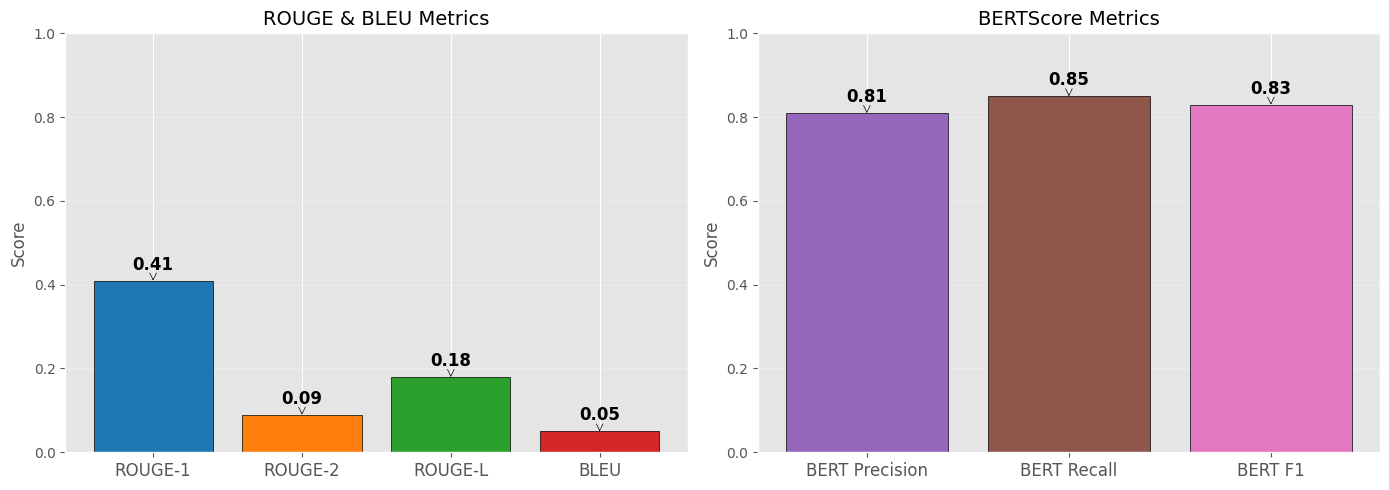

In [46]:
import matplotlib.pyplot as plot
import numpy as np
plot.style.use('ggplot')

rouge1 = 0.41
rouge2 = 0.09
rougeL = 0.18
bleu   = 0.05
bertPrecision = 0.81
bertRecall    = 0.85
bertF1        = 0.83

labelsFirst = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'BLEU']
valuesFirst = [rouge1, rouge2, rougeL, bleu]
colors1     = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

labelsSecond = ['BERT Precision', 'BERT Recall', 'BERT F1']
valuesSecond = [bertPrecision, bertRecall, bertF1]
colors2      = ['#9467bd', '#8c564b', '#e377c2']

fig, axs = plot.subplots(1, 2, figsize=(14, 5))

x1 = np.arange(len(labelsFirst))
bars1 = axs[0].bar(x1, valuesFirst, color=colors1, edgecolor='black')
axs[0].set_xticks(x1)
axs[0].set_xticklabels(labelsFirst, fontsize=12)
axs[0].set_ylabel("Score", fontsize=12)
axs[0].set_title("ROUGE & BLEU Metrics", fontsize=14)
axs[0].set_ylim(0, 1)
axs[0].grid(axis='y', alpha=0.3)

for bar in bars1:
    height = bar.get_height()
    axs[0].annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    arrowprops=dict(arrowstyle='->', color='black'),
                    fontsize=12, fontweight='bold')

x2 = np.arange(len(labelsSecond))
bars2 = axs[1].bar(x2, valuesSecond, color=colors2, edgecolor='black')
axs[1].set_xticks(x2)
axs[1].set_xticklabels(labelsSecond, fontsize=12)
axs[1].set_ylabel("Score", fontsize=12)
axs[1].set_title("BERTScore Metrics", fontsize=14)
axs[1].set_ylim(0, 1)
axs[1].grid(axis='y', alpha=0.3)
for bar in bars2:
    height = bar.get_height()
    axs[1].annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    arrowprops=dict(arrowstyle='->', color='black'),
                    fontsize=12, fontweight='bold')

plot.tight_layout()
plot.show()

   **Brief Analysis of Results:**

*ROUGE Metrics:*

1. ROUGE-1 (approximately 41%): key content words are largely captured.
2. ROUGE-2 (approximately 8.8%): Lower bigram overlap, which is common in summarization given the paraphrasing change.
3. ROUGE-L (approximately 18.2%): Little preservation of structure & sequence can be seen.

BLEU Score: BLEU (approximately is 4.7%): Low n-gram match score, is found typical in summarization tasks where wording can vary while retaining meaning.

*BERTScore Metrics:*
1. Precision: ≈0.81
2. Recall: ≈0.85
3. F1: ≈0.83

High BERTScore values mesn that, the generated summaries align well with the references.The Roberta warning about uninitialized weights is usual when using a pretrained model for a new task and can generally be ignored, most of the times.

The model may benefit from additional training data/epochs to improve lexical overlaps as measured by ROUGE and BLEU, even though semantic quality (BERTScore) is already good.

*Post processing and testing*

In [52]:
import torch
import re
from datasets import load_dataset
from transformers import BartForConditionalGeneration, BartTokenizer

def cleanSummary(text):
    text = re.sub(r'[^\x20-\x7E]', '', text)
    text = re.sub(r'Enlarge this image\s*toggle caption.*?AP', '', text, flags=re.IGNORECASE)
    text = re.sub(r'(?i)image caption', '', text)
    text = re.sub(r'\(\s*\)', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

dataSet = load_dataset("alexfabbri/multi_news")
sampleEx = dataSet["test"][0] if "test" in dataSet else dataSet["train"][0]
docText = sampleEx["document"]
refSummary = sampleEx["summary"]

tokenizerInst = BartTokenizer.from_pretrained("facebook/bart-base")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")
model.eval()

inputs = tokenizerInst(docText, return_tensors="pt", truncation=True, max_length=1024)
with torch.no_grad():
    genTokens = model.generate(
        inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        max_length=256,
        num_beams=4,
        forced_bos_token_id=tokenizerInst.bos_token_id,
        early_stopping=True,
        no_repeat_ngram_size=3)
rawSummary = tokenizerInst.decode(genTokens[0], skip_special_tokens=True)
cleanedSummary = cleanSummary(rawSummary)

print("Document is given below:")
print(docText)
print("\nReference Summary is given as:")
print(refSummary)
print("\nGenerated Summary is given as:")
print(cleanedSummary)

Document is given below:
GOP Eyes Gains As Voters In 11 States Pick Governors 
 
 Enlarge this image toggle caption Jim Cole/AP Jim Cole/AP 
 
 Voters in 11 states will pick their governors tonight, and Republicans appear on track to increase their numbers by at least one, with the potential to extend their hold to more than two-thirds of the nation's top state offices. 
 
 Eight of the gubernatorial seats up for grabs are now held by Democrats; three are in Republican hands. Republicans currently hold 29 governorships, Democrats have 20, and Rhode Island's Gov. Lincoln Chafee is an Independent. 
 
 Polls and race analysts suggest that only three of tonight's contests are considered competitive, all in states where incumbent Democratic governors aren't running again: Montana, New Hampshire and Washington. 
 
 While those state races remain too close to call, Republicans are expected to wrest the North Carolina governorship from Democratic control, and to easily win GOP-held seats in Ut

2. Deploy your trained model. This could be a simple app that takes a text as input and returns a summary.

In [54]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 117.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.1 MB/s eta 0:00:00


In [57]:
import gradio as gr
import torch
import re
import random
from datasets import load_dataset
from transformers import BartForConditionalGeneration, BartTokenizer

def cleanSummary(text):
    text = re.sub(r'[^\x20-\x7E]', '', text)
    text = re.sub(r'Enlarge this image\s*toggle caption.*?AP', '', text, flags=re.IGNORECASE)
    text = re.sub(r'(?i)image caption', '', text)
    text = re.sub(r'\(\s*\)', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

dataSet = load_dataset("alexfabbri/multi_news")
multiNewsSet = dataSet["test"] if "test" in dataSet else dataSet["train"]


def getRandomSample():
    return random.choice(multiNewsSet)

tokenizerInst = BartTokenizer.from_pretrained("facebook/bart-base")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")
model.eval()

def summarizeText(sourceChoice, customText):
    if sourceChoice == "Multi-News Sample":
        sampleEx = getRandomSample()
        docText = sampleEx["document"]
        refText = sampleEx.get("summary", "No reference provided")
    else:
        docText = customText
        refText = "N/A"

    inputs = tokenizerInst(docText, return_tensors="pt", truncation=True, max_length=1024)
    with torch.no_grad():
        genTokens = model.generate(
            inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            min_length=30,
            max_length=256,
            length_penalty=2.0,
            num_beams=4,
            no_repeat_ngram_size=3,
            early_stopping=True
        )
    rawSummary = tokenizerInst.decode(genTokens[0], skip_special_tokens=True)
    summaryClean = cleanSummary(rawSummary)

    outputText = f"Selected Document:\n{docText}\n\n"
    if sourceChoice == "Multi-News Sample":
        outputText += f"Reference Summary:\n{refText}\n\n"
    outputText += f"Generated Summary:\n{summaryClean}"
    return outputText

iface = gr.Interface(
    fn=summarizeText,
    inputs=[
        gr.Radio(["Multi-News Sample", "Custom Text"], label="Input Source", value="Multi-News Sample"),
        gr.Textbox(lines=10, label="Document Text (if Custom Text is selected)")
    ],
    outputs=gr.Textbox(label="Output"),
    title="Abstractive Summarization App",
    description="Select 'Multi-News Sample' to use a random news article from multi-news (with the article and its reference shown), or 'Custom Text' to provide your own document for summarization."
)

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://385329fd2b3af5d50a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


3. Record a short video (~5 mins) demonstrating how it works. Explain the key aspects of your implementation and deployment process in the video.
   a. Upload the video to UBbox and create a shared link
   b. Add the link at the end of your ipynb file.

   **Shared UBbox Video Link:**

Video Link: https://buffalo.box.com/s/fzqjnpfgp0bhcxlihrrrj1gwc1n1v5fw

4. References. Include details on all the resources used to complete this part.

1. Dataset: https://huggingface.co/datasets/alexfabbri/multi_news
Multi-News – news articles and human-written summaries of these articles
2. https://medium.com/@singhrajni2210/large-language-models-and-text-summarization-a-powerful-combination-6400e7643b70
3. https://github.com/GoogleCloudPlatform/generative-ai/blob/main/language/use-cases/document-summarization/summarization_large_documents_langchain.ipynb
4. https://github.com/gkamradt/langchain-tutorials/blob/main/data_generation/5%20Levels%20Of%20Summarization%20-%20Novice%20To%20Expert.ipynb
5. https://huggingface.co/learn/llm-course/en/chapter7/5
6. https://www.youtube.com/watch?v=msgLLudzlLg
